# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
* Задача 4 &mdash;  30 баллов





-----

In [1]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
import graphviz

# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

## Задача 2

### 1. Загрузка и предобработка данных.
### *Профиль физика*



Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`.



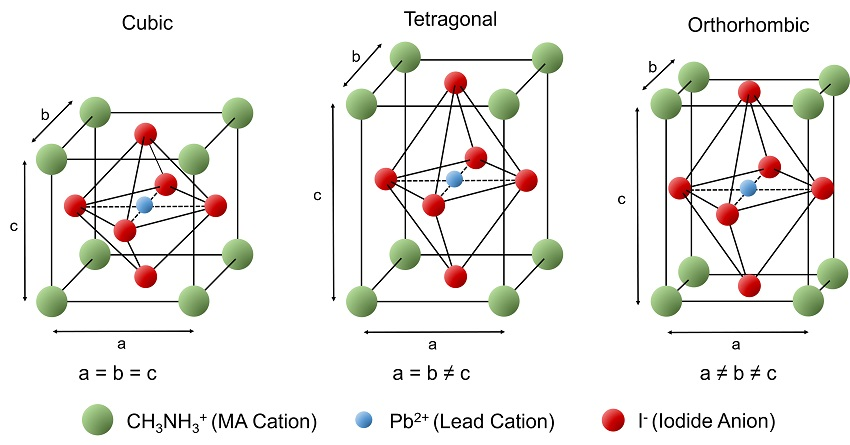


Каждое наблюдение описывается 13 столбцами признаков и 1 столбцом класса, который идентифицирует его как кубическую, тетрагональную, ромбическую или ромбоэдрическую структуру. Наборы признаков - различные параметры кристаллической решетки, такие как валентность, ионный радиус, среднее значение электроотрицательности, постоянная решетки, а так же энергия, которая численно равна работе, которую необходимо затратить, чтобы разделить и отделить друг от друга на бесконечное расстояние частицы.

In [4]:
data = pd.read_csv("Crystal_structure.csv")
data

Compound   A   B  In literature v(A) v(B)  r(AXII)(Å)  r(AVI)(Å)  \
0       Ac2O3  Ac  Ac          False    0    0        1.12       1.12   
1      AcAgO3  Ac  Ag          False    0    0        1.12       1.12   
2      AcAlO3  Ac  Al          False    0    0        1.12       1.12   
3      AcAsO3  Ac  As          False    0    0        1.12       1.12   
4      AcAuO3  Ac  Au          False    0    0        1.12       1.12   
...       ...  ..  ..            ...  ...  ...         ...        ...   
5324    ZrWO3  Zr   W          False    1    5        0.89       0.72   
5325    ZrYO3  Zr   Y          False    -    -        0.89       0.72   
5326   ZrYbO3  Zr  Yb          False    -    -        0.89       0.72   
5327   ZrZnO3  Zr  Zn          False    -    -        0.89       0.72   
5328    Zr2O3  Zr  Zr          False    -    -        0.89       0.72   

      r(BVI)(Å)  EN(A)  EN(B)  l(A-O)(Å)  l(B-O)(Å)      ΔENR        tG  \
0          1.12   1.10   1.10    0.00000   0.000000 -3.248000  0.707107   
1          0.95   1.10   1.93    0.00000   2.488353 -2.565071  0.758259   
2          0.54   1.10   1.61    0.00000   1.892894 -1.846714  0.918510   
3          0.52   1.10   2.18    0.00000   1.932227 -1.577429  0.928078   
4          0.93   1.10   2.54    0.00000   2.313698 -2.279786  0.764768   
...         ...    ...    ...        ...        ...       ...       ...   
5324       0.62   1.33   2.36    2.38342   1.745600 -1.572214  0.801621   
5325       0.90   1.33   1.22    2.38342   2.235124 -2.489571  0.704032   
5326       0.95   1.33   1.10    2.38342   2.223981 -2.626821  0.689053   
5327       0.74   1.33   1.65    2.38342   2.096141 -2.035750  0.756670   
5328       0.72   1.33   1.33    2.38342   2.043778 -2.097821  0.763809   

                τ         μ Lowest distortion  
0               -  0.800000             cubic  
1               -  0.678571      orthorhombic  
2               -  0.385714             cubic  
3               -  0.371429      orthorhombic  
4               -  0.664286      orthorhombic  
...           ...       ...               ...  
5324  5.228952455  0.442857             cubic  
5325            -  0.642857             cubic  
5326            -  0.678571      orthorhombic  
5327            -  0.528571             cubic  
5328            -  0.514286             cubic  

[5329 rows x 18 columns]

Сделаем предобработку данных.

In [5]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

/tmp/ipykernel_31785/2274344533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0
/tmp/ipykernel_31785/2274344533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0
/tmp/ipykernel_31785/2274344533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0
/tmp/ipykernel_31785/2274344533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [6]:
data

A   B v(A) v(B)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  EN(B)  \
0      0   0    0    0        1.12       1.12       1.12   1.10   1.10   
1      0   1    0    0        1.12       1.12       0.95   1.10   1.93   
2      0   2    0    0        1.12       1.12       0.54   1.10   1.61   
3      0   3    0    0        1.12       1.12       0.52   1.10   2.18   
4      0   4    0    0        1.12       1.12       0.93   1.10   2.54   
...   ..  ..  ...  ...         ...        ...        ...    ...    ...   
5271  72  68    1    5        0.89       0.72       0.62   1.33   2.36   
5272  72  69    0    0        0.89       0.72       0.90   1.33   1.22   
5273  72  70    0    0        0.89       0.72       0.95   1.33   1.10   
5274  72  71    0    0        0.89       0.72       0.74   1.33   1.65   
5275  72  72    0    0        0.89       0.72       0.72   1.33   1.33   

      l(A-O)(Å)  l(B-O)(Å)      ΔENR        tG         μ  Lowest distortion  
0       0.00000   0.000000 -3.248000  0.707107  0.800000                  0  
1       0.00000   2.488353 -2.565071  0.758259  0.678571                  1  
2       0.00000   1.892894 -1.846714  0.918510  0.385714                  0  
3       0.00000   1.932227 -1.577429  0.928078  0.371429                  1  
4       0.00000   2.313698 -2.279786  0.764768  0.664286                  1  
...         ...        ...       ...       ...       ...                ...  
5271    2.38342   1.745600 -1.572214  0.801621  0.442857                  0  
5272    2.38342   2.235124 -2.489571  0.704032  0.642857                  0  
5273    2.38342   2.223981 -2.626821  0.689053  0.678571                  1  
5274    2.38342   2.096141 -2.035750  0.756670  0.528571                  0  
5275    2.38342   2.043778 -2.097821  0.763809  0.514286                  0  

[5276 rows x 15 columns]

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [7]:
# heart = pd.read_csv('heart.csv')

### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [8]:
X = data.drop(["Lowest distortion"], axis=1)
y = data['Lowest distortion']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=207)

Обучите модель решающего дерева.

In [10]:
dtc = DecisionTreeClassifier(random_state=207)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=207)

Сделайте предсказание для тестовой выборки.

In [11]:
y_pred = dtc.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))

Accuracy =  0.7037271004421983


Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [12]:
success = np.array(y_pred == y_test, dtype=int)
np.mean(success)

0.7037271004421983

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [13]:
def bernoulli_confidence_interval(data, alpha=0.95):
    n = len(data)
    p_hat = np.mean(data)  # Оценка параметра theta (доля успехов)
    z = norm.ppf((1 + alpha) / 2)
    margin_error = z * np.sqrt(p_hat * (1 - p_hat) / n) 
    lower_bound = p_hat - margin_error
    upper_bound = p_hat + margin_error
    return lower_bound, upper_bound


lower_bound, upper_bound = bernoulli_confidence_interval(success)
print(f"Доверительный интервал для решающего дерева: ({lower_bound:.4f}, {upper_bound:.4f})")

Доверительный интервал для решающего дерева: (0.6812, 0.7262)


Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [14]:
rfc = RandomForestClassifier(random_state=207)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("accuracy = ", accuracy_score(y_test, y_pred))
success_forest = np.array(y_pred == y_test, dtype=int)

lower_bound_forest, upper_bound_forest = bernoulli_confidence_interval(success_forest)
print(f"Доверительный интервал для случайного леса: ({lower_bound_forest:.4f}, {upper_bound_forest:.4f})")

accuracy =  0.7744788376500316
Доверительный интервал для случайного леса: (0.7539, 0.7951)


**Выводы:** Точность случайного леса превосходит точность решающего дерева. Также заметим, что доверительные интервалы не перекрываются.

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных
### *Профиль физика*

Рассмотрим <a href='https://archive.ics.uci.edu/dataset/291/airfoil+self+noise' target="_blank">набор данных НАСА</a>, он включает в себя аэродинамические профили NACA-0012 разных размеров при различных параметрах в аэродинамической трубе и углах атаки. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. Целевой переменной будет scaled-sound-pressure: это звуковое давление в определенной части лопасти, распределение этой величины показано на втором рисунке. Данная задача конечно имеет почти аналитическое решение, однако оно занимает довольно много времени и ресурсов. Мы хотим продемострировать возможность использования лесов для быстрых и довольно точных численных оценок.



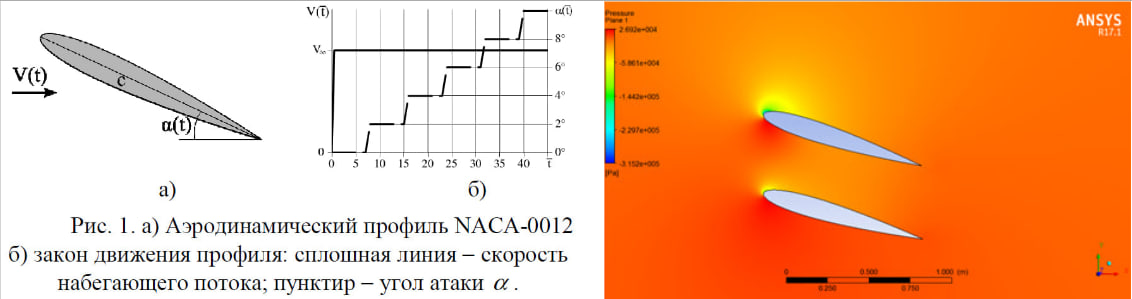

In [15]:
column_names = ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', "suction-side-displacement-thickness", "scaled-sound-pressure"]
df = pd.read_csv("airfoil_self_noise.dat", sep='\t', names=column_names)
df.isna().sum()

frequency                              0
attack-angle                           0
chord-length                           0
free-stream-velocity                   0
suction-side-displacement-thickness    0
scaled-sound-pressure                  0
dtype: int64

In [16]:
df = df.rename(columns={'scaled-sound-pressure': 'target'})
df = df.sample(frac=1).reset_index(drop=True)

In [17]:
X = df.drop('target',axis=1)
y = df[['target']]

In [18]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

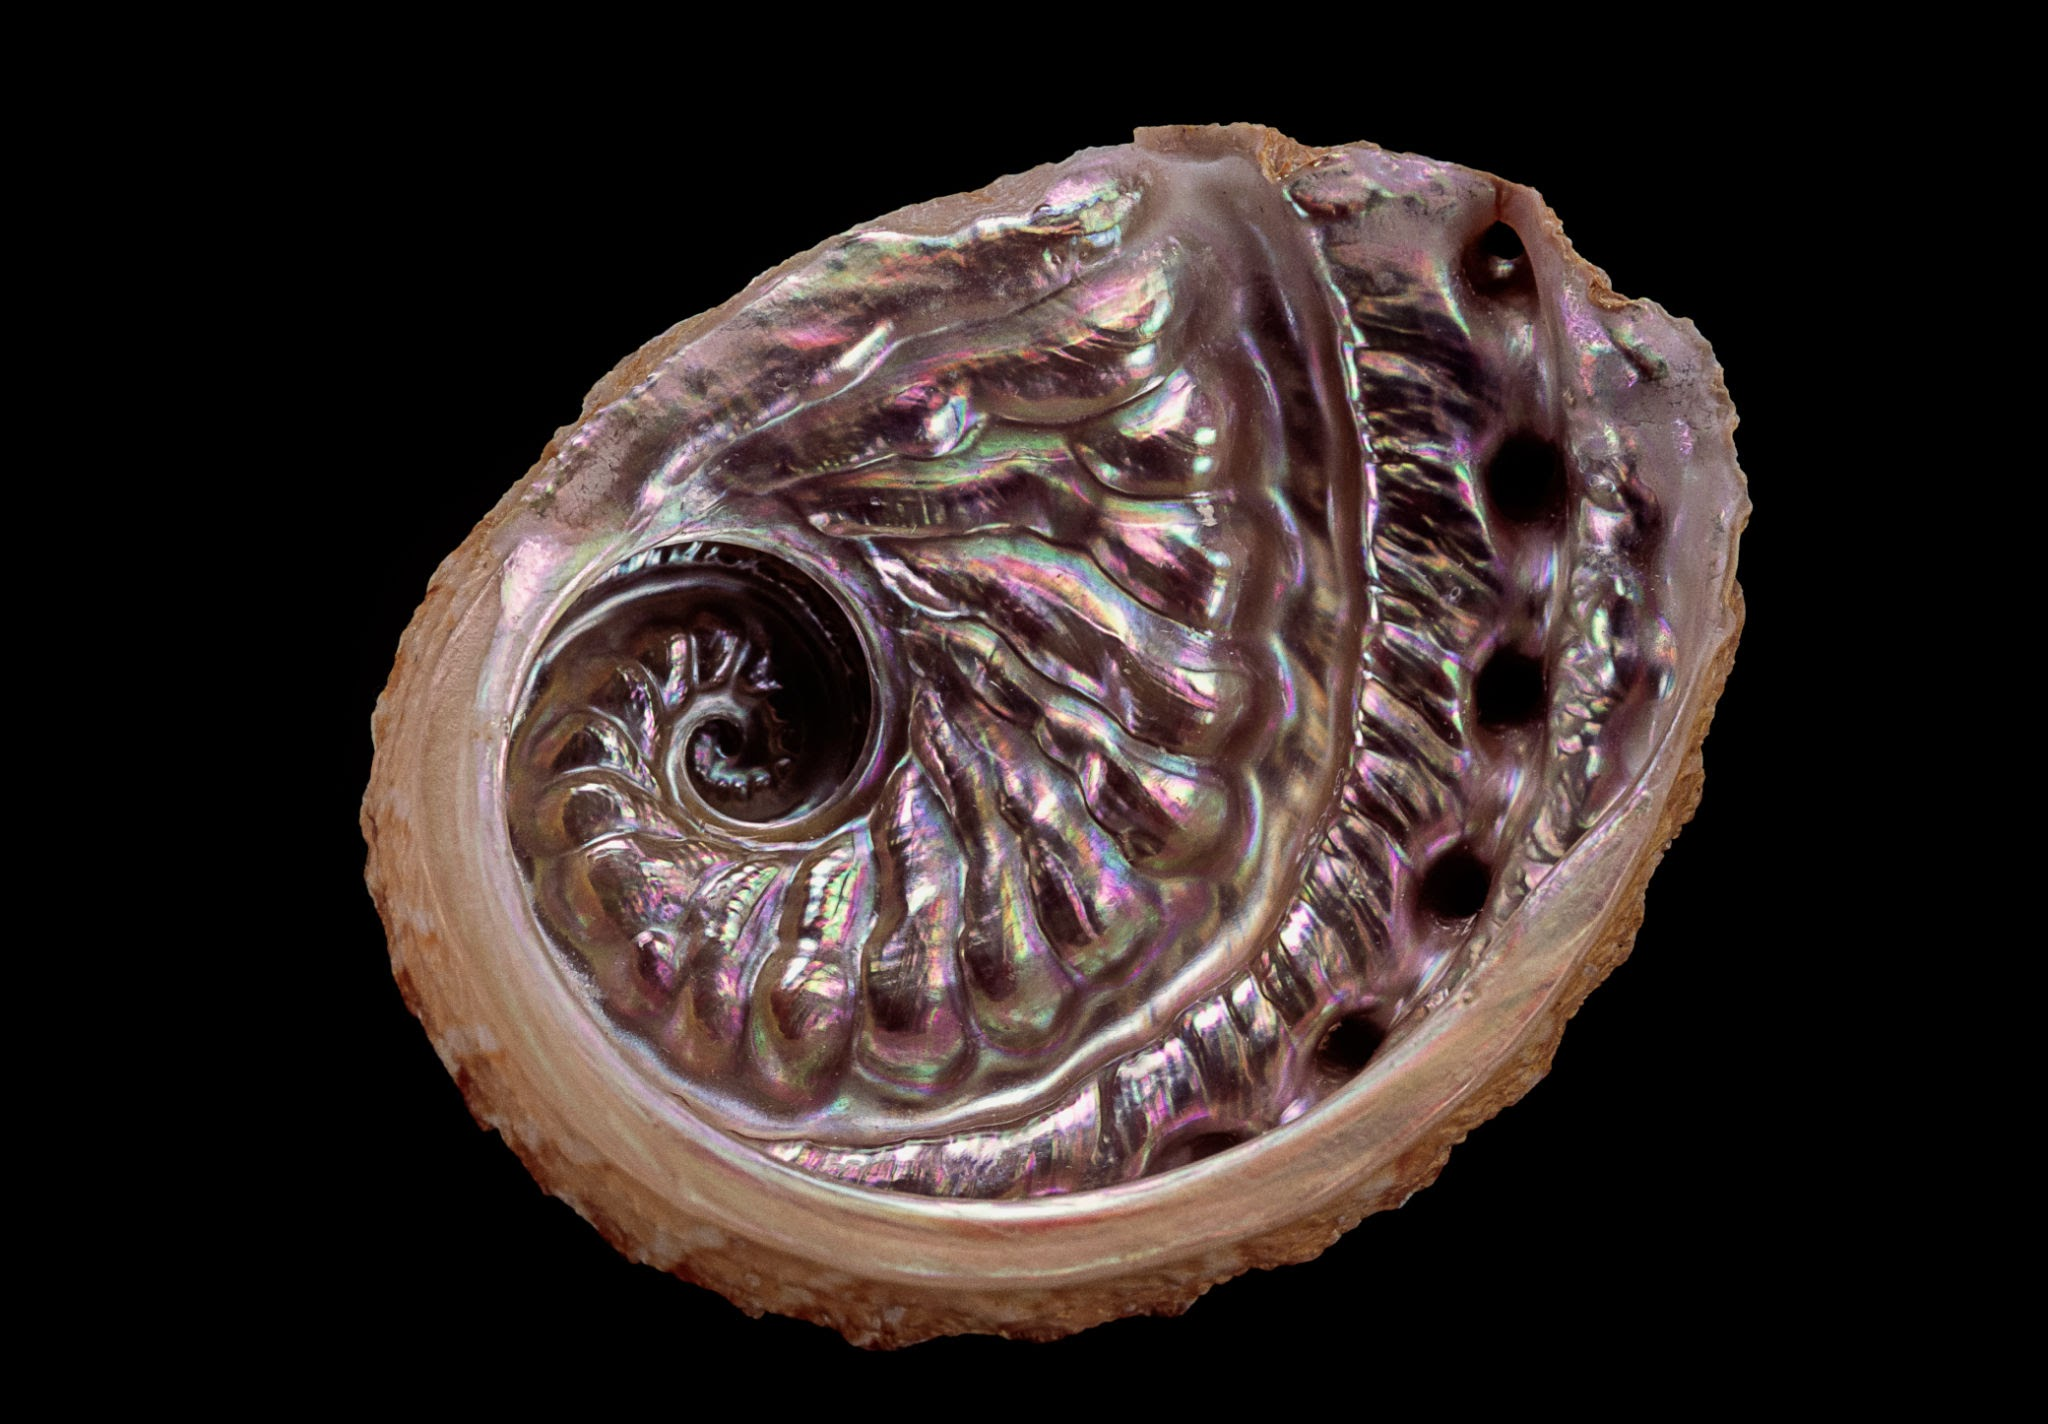

In [19]:
# data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
#                                           'Shucked weight', 'Viscera weight', 'Shell weight',
#                                           'Rings'])

In [20]:
# data = data.drop('Sex', axis=1)
# X = data.drop('Rings', axis=1)
# y = data['Rings'] + 1.5

In [21]:
# X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

In [22]:
def get_graphviz_graph(decision_tree_regressor, X_, y_):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X_, y_)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X_.columns, 
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)  

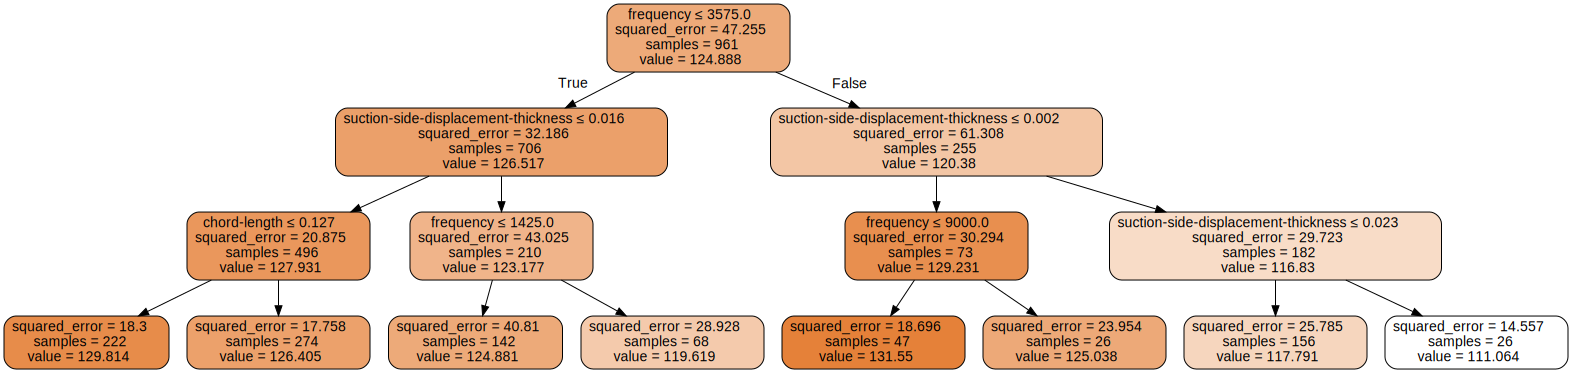

In [23]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=207)
graph = get_graphviz_graph(dtr, X_train, y_train)
graph

Посчитайте выбранную метрику на валидационной выборке.

In [24]:
y_pred = dtr.predict(X_valid)
print("MAPE = ", mean_absolute_percentage_error(y_valid, y_pred)*100)

MAPE =  3.417376777518153


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [25]:
def get_train_and_valid_mape(param_name, grid):
    '''
    Функция для оценки точности классификации 
    для заданных значений параметра param_name
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра
    '''
        
    train_acc, valid_acc = [], []
    
    for param_value in grid:
        estimator = DecisionTreeRegressor(**{param_name: param_value})
        estimator.fit(X_train, y_train)
        train_acc.append(mean_absolute_percentage_error(y_train, estimator.predict(X_train)))
        valid_acc.append(mean_absolute_percentage_error(y_valid, estimator.predict(X_valid)))
    return train_acc, valid_acc

In [26]:
def plot_dependence(param_name, grid=range(2, 20), title=''):
    '''
    Функция для отображения графика зависимости accuracy 
    от значения параметра c названием param_name
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра,
    3) title - заголовок графика
    '''
    
    plt.figure(figsize=(12, 6))
    
    train_acc, valid_acc = get_train_and_valid_mape(param_name, grid)
        
    plt.plot(grid, train_acc, label='train', lw=3)
    plt.plot(grid, valid_acc, label='valid', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('MAPE')
    plt.title(title, fontsize=20)
    plt.show()

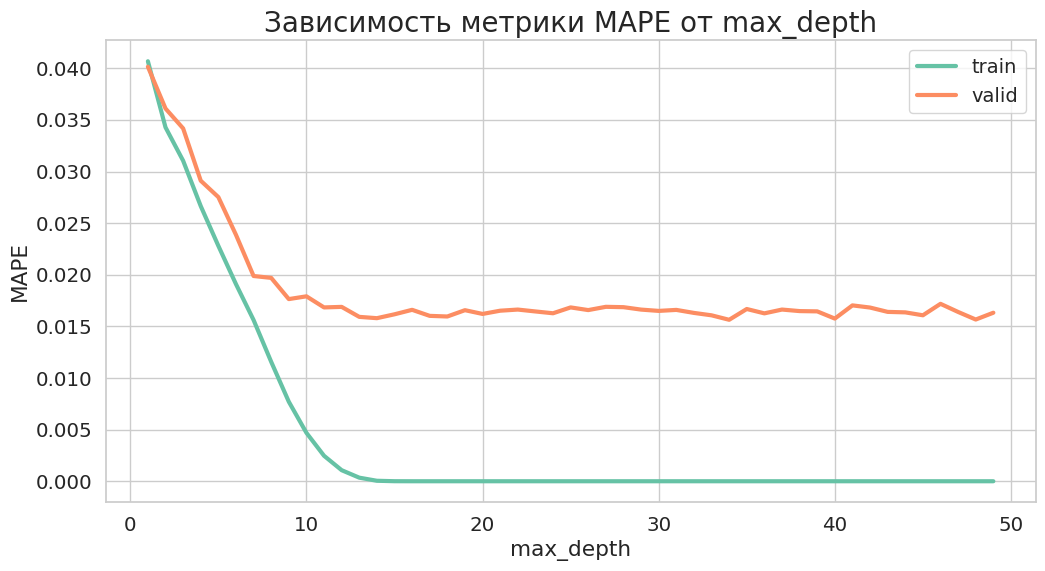

In [27]:
plot_dependence(
    'max_depth', range(1, 50), 
    title='Зависимость метрики MAPE от max_depth'
)

При max_depth = 10 достигается минимальное значение MAPE на valid'е

In [28]:
max_depth = 15

Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

In [29]:
def get_train_and_valid_mape(param_name, grid):
    '''
    Функция для оценки точности классификации 
    для заданных значений параметра param_name
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра
    '''
        
    train_acc, valid_acc = [], []
    
    for param_value in grid:
        estimator = DecisionTreeRegressor(max_depth=max_depth, **{param_name: param_value})
        estimator.fit(X_train, y_train)
        train_acc.append(mean_absolute_percentage_error(y_train, estimator.predict(X_train)))
        valid_acc.append(mean_absolute_percentage_error(y_valid, estimator.predict(X_valid)))
    return train_acc, valid_acc

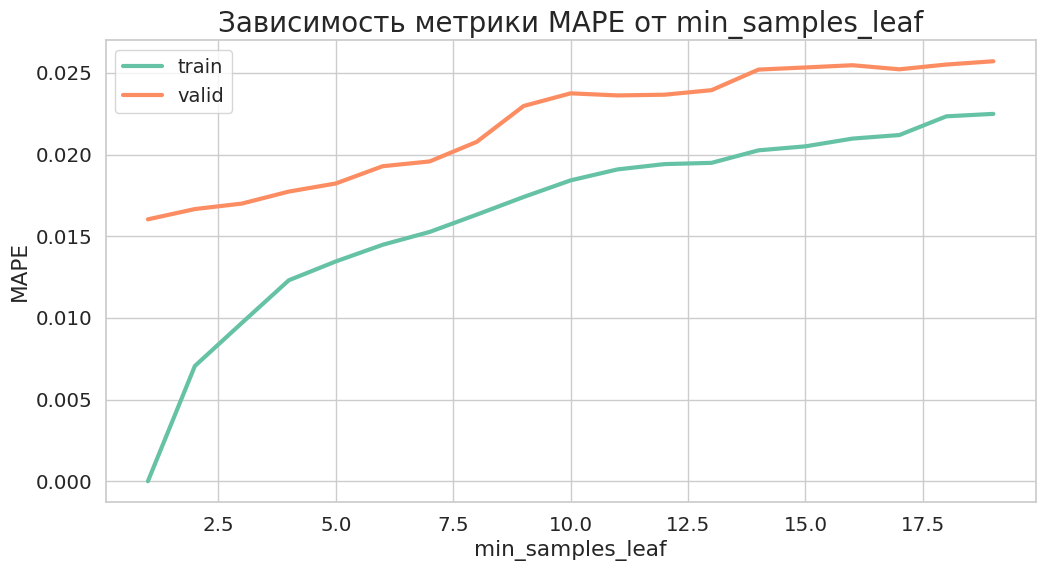

In [30]:
plot_dependence(
    'min_samples_leaf', range(1, 20), 
    title='Зависимость метрики MAPE от min_samples_leaf'
)

In [31]:
min_samples_leaf = 1

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [32]:
dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=207)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(f"MAPE = {(mean_absolute_percentage_error(y_test, y_pred)*100).round(4)}%")

MAPE = 1.7582%


Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [33]:
model = DecisionTreeRegressor(random_state=207)
grid = {"max_depth" : np.arange(1,25), "min_samples_leaf" : np.arange(1,25)}
gs = GridSearchCV(model, grid, scoring="neg_mean_absolute_percentage_error")
gs.fit(X_train, y_train)

y_pred_gs = gs.predict(X_test)
print("Параметры - ", gs.best_params_)

Параметры -  {'max_depth': 17, 'min_samples_leaf': 1}


Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

In [34]:
def get_graphviz_graph(decision_tree_regressor, X_):
    '''
    Функция для построения
    по решающему дереву графа graphviz для визуализации
    '''
    
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X_.columns, 
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)  

**Ваша модель**

In [35]:
print(f"MAPE = {mean_absolute_percentage_error(y_test, y_pred).round(4)*100}%")
get_graphviz_graph(dtr, X_train)

MAPE = 1.76%


**Лучшая модель по мнению GridSearchCV**

In [36]:
# У GrindSearchCV нет feature_importances, обучу модесь с такими же параметрами
dtr_gs = DecisionTreeRegressor(**gs.best_params_, random_state=207)
dtr_gs.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=207)

In [37]:
print(f"MAPE = {mean_absolute_percentage_error(y_test, y_pred_gs).round(4)*100}%")
get_graphviz_graph(dtr_gs, X_train)

MAPE = 1.76%


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

<Axes: >

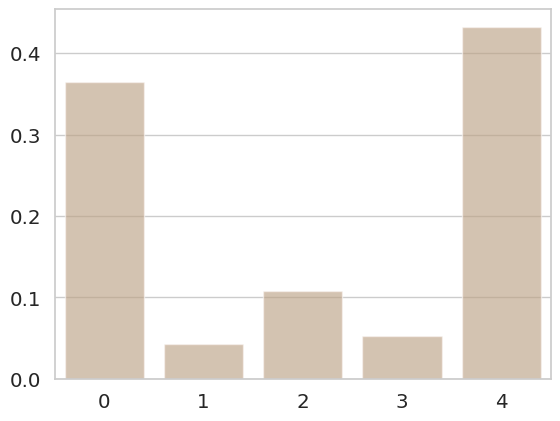

In [38]:
sns.barplot(dtr.feature_importances_, alpha=0.4)
sns.barplot(dtr_gs.feature_importances_, alpha=0.4)

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:** наша модель и лучшая модель по мнению GridSearchCV показали одинаковую MAPE, заметим, что лучшие параметры у нас похоже, хотя GridSearchCV искал их намного дольше. На последней гистограмме значение важности признаков практически одинаковые у нас и у GridSearchCV.  признаки идут в таком порядке: frequency  attack-angle  chord-length  free-stream-velocity suction-side-displacement-thickness. То есть, исходя из гистограммы, частота и толщина всасывания бокового смещения имеют наибольшие веса, а угол атаки, длина хорды и скорость свободного потока наименьшие.

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [39]:
rfr = RandomForestRegressor(n_estimators=500, random_state=207)
rfr.fit(X_test,y_test)

/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500, random_state=207)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [40]:
train_mape = []
valid_mape = []

y_pred_train = [tree.predict(X_train) for tree in rfr.estimators_]
y_pred_valid = [tree.predict(X_valid) for tree in rfr.estimators_]

cum_y_pred_train = np.cumsum(y_pred_train, axis=0)
cum_y_pred_valid = np.cumsum(y_pred_valid, axis=0)

for n_trees in range(1, 500):
    train_mape.append(mean_absolute_percentage_error(y_train, cum_y_pred_train[n_trees]/n_trees))
    valid_mape.append(mean_absolute_percentage_error(y_valid, cum_y_pred_valid[n_trees]/n_trees))

/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.w

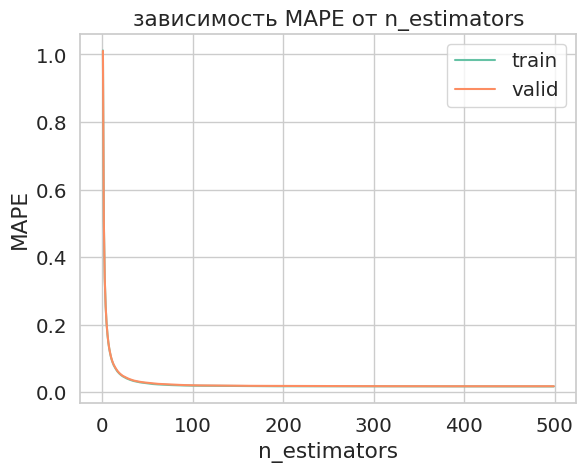

In [41]:
plt.plot(np.arange(1, 500), train_mape, label="train")
plt.plot(np.arange(1, 500), valid_mape, label="valid")
plt.xlabel("n_estimators")
plt.ylabel("MAPE")
plt.title("зависимость MAPE от n_estimators")

plt.legend()

Посчитайте метрику на тестовой выборке.

In [42]:
y_pred = rfr.predict(X_test)
print(f"MAPE = {mean_absolute_percentage_error(y_test, y_pred).round(4)*100}%")

MAPE = 0.62%


Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

<Axes: >

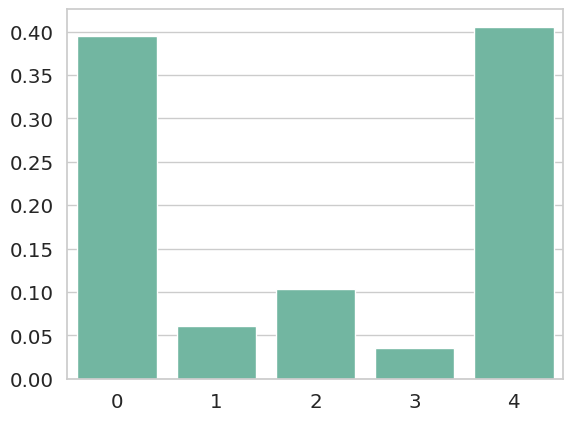

In [43]:
sns.barplot(rfr.feature_importances_)

Сделайте выводы.

**Вывод:** ошибка случайного леса получилась меньше, чем у решающего дерева. Из графика видно, что ошибка уменьшается при увеличении колличества переобученных деревьев. Также немного перераспределились веса между 1, 2, 3 параметрами на гистограмме, хотя 0 и 4 остались без изменения.